<a href="https://colab.research.google.com/github/ValeriaYashan/Herramientas-IA/blob/main/Stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalación de bibliotecas necesarias
!pip install --quiet --upgrade diffusers transformers accelerate mediapy

# 'diffusers': Librería para difuminar imágenes.
# 'transformers': Librería para utilizar modelos de Transformers.
# 'accelerate': Librería de Hugging Face para acelerar entrenamiento de modelos.
# 'mediapy': Librería para manipulación de medios.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.3 MB/s eta 0:00:00


In [ ]:
# Importación de la biblioteca mediapy con el alias 'media'
import mediapy as media

# Importación del módulo 'random' para generación de números aleatorios
import random

# Importación del módulo 'sys' para funciones relacionadas con el sistema
import sys

# Importación de la biblioteca 'torch' para operaciones con tensores y aprendizaje profundo
import torch

# Importación de la clase 'AutoPipelineForText2Image' desde el módulo 'diffusers'
from diffusers import AutoPipelineForText2Image

# Creación de una instancia de 'AutoPipelineForText2Image' desde un modelo preentrenado llamado "stabilityai/sdxl-turbo"
# Configuración del tipo de dato de torch como float16, uso de SafeTensors y variante como "fp16"
pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)

# Movimiento del modelo a la GPU ('cuda')
pipe = pipe.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Prompt:	a picture of Mikey mouse sailing in San Fernando, Buenos Aires, Argentina
Seed:	7137685943117590106


""

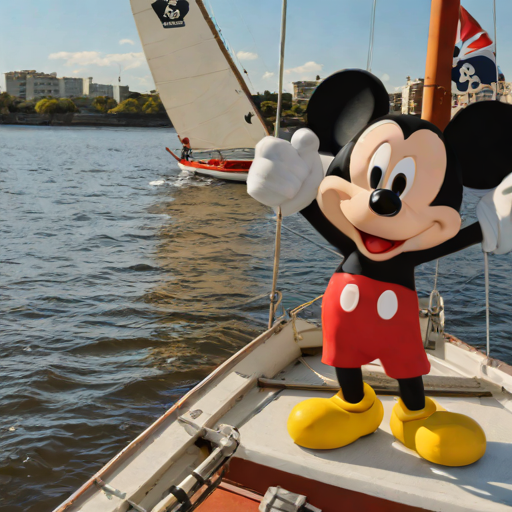

In [ ]:
prompt = "a picture of Mikey mouse sailing in San Fernando, Buenos Aires, Argentina"
seed = random.randint(0, sys.maxsize)

num_inference_steps = 4

images = pipe(
    prompt = prompt,
    guidance_scale = 0.0,
    num_inference_steps = num_inference_steps,
    generator = torch.Generator("cuda").manual_seed(seed),
    ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("output.jpg")

  0%|          | 0/4 [00:00<?, ?it/s]

Prompt:	A picture of Pikachu enjoying a meal with a scenic backdrop of building in parque naútico, San Fernando, Argentina.
Seed:	2784490370777869910


""

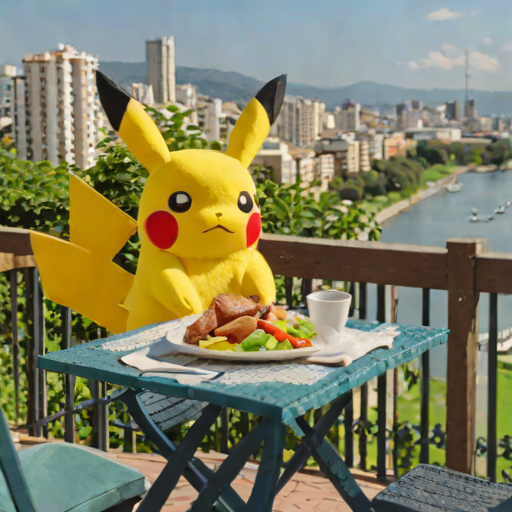

In [ ]:
prompt = "A picture of Pikachu enjoying a meal with a scenic backdrop of building in parque naútico, San Fernando, Argentina."
seed = random.randint(0, sys.maxsize)

num_inference_steps = 4

images = pipe(
    prompt = prompt,
    guidance_scale = 0.0,
    num_inference_steps = num_inference_steps,
    generator = torch.Generator("cuda").manual_seed(seed),
    ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("output.jpg")